IMPORTS

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score




LOADING DATA

In [27]:
iris = load_iris()
X = iris.data
y = iris.target


This graph shows the relationship between different characteristics (sepal length, sepal width, petal length, and petal width) of the flowers in the Iris data set. Each point on the graph represents a flower sample. The samples are colored according to the iris species to which they belong, which makes it possible to visualize how the different species are distributed based on the measured characteristics

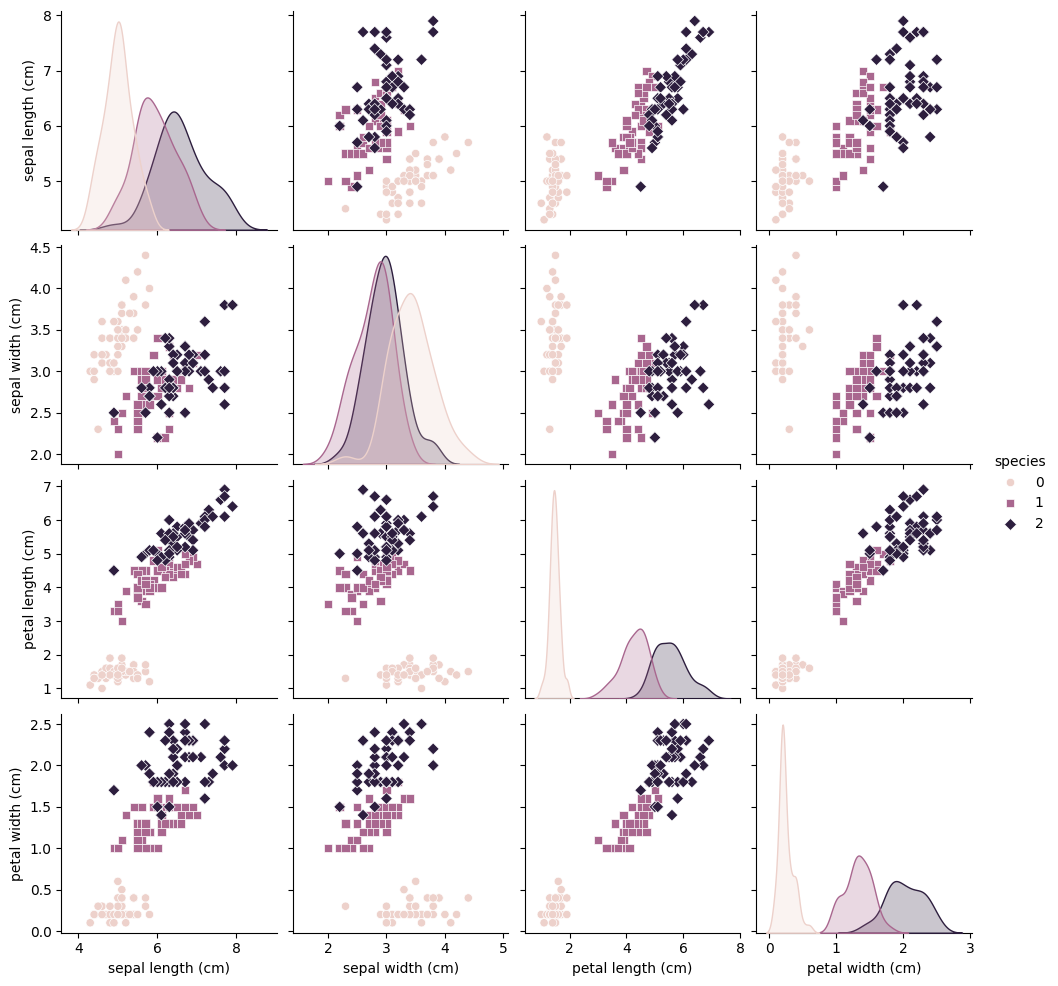

In [28]:


iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()


SPLIT DATA (TRAINING,TEST,VALIDATION)

In [29]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, dividir el conjunto de entrenamiento en entrenamiento (80% del 80% original) y validación (20% del 80% original)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
X_train = X_train.reshape((96, 4))  # Reformatear a (número de muestras, número de características)


ONE-HOT CODIFICATION

In [18]:

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

NETWORK

In [19]:


model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), activation='relu'))  
model.add(Dense(250, activation='relu'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/home/ezequielgarcia/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TRAINING

In [20]:
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=150, validation_data=(X_val, y_val_one_hot))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 1.1140 - val_accuracy: 0.2083 - val_loss: 1.2010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3542 - loss: 1.0197 - val_accuracy: 0.5417 - val_loss: 0.9717
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6875 - loss: 0.8708 - val_accuracy: 0.7917 - val_loss: 0.8236
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7083 - loss: 0.8115 - val_accuracy: 0.7917 - val_loss: 0.7611
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6875 - loss: 0.7532 - val_accuracy: 0.6667 - val_loss: 0.7375
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8854 - loss: 0.6766 - val_accuracy: 0.5417 - val_loss: 0.7485
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6875 - loss: 0.6282 - val_accuracy: 0.5417 - val_loss: 0.7450
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6875 - loss: 0.5971 - val_accuracy: 0.5417 - val_loss: 0.6910
Ep

GRAPH TO VISUALIZE OVERFITTING AND GENERAL DETAILS

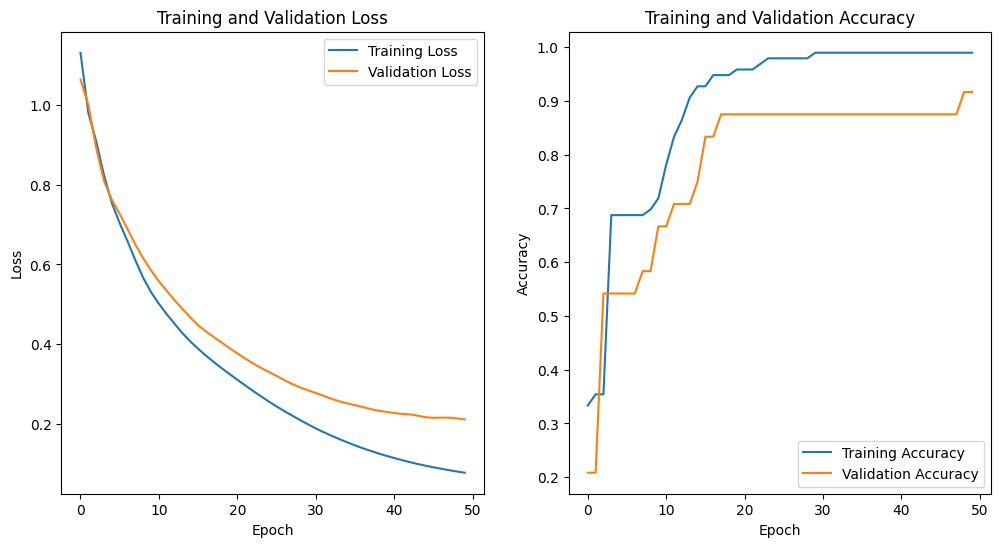

In [11]:

# Obtener la precisión y la pérdida del conjunto de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear subplots
plt.figure(figsize=(12, 6))

# Plot de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot de precisión
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar los gráficos
plt.show()


PREDICTION AND ACCURACY ON TEST DATA

In [21]:


y_pred = model.predict(X_test)

# Convertir las predicciones de probabilidad a clases predichas
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes)
print("Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Accuracy: 1.0


LABELS ||
0: Iris setosa
1: Iris versicolor
2: Iris virginica

feature 1 = Sepal length (centimeters)

feature 2 = Sepal width (centimeters)

feature 3 = Petal length (centimeters)

feature 4 = Petal width (centimeters)

TESTING WITH DIFFERENT DATA AND RESULTS

In [25]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
predictions = model.predict(new_data)
porcentajes = np.array(predictions) * 100
porcentajes_formateados = ["{:.2f}%".format(valor) for valor in porcentajes[0]]
print(porcentajes_formateados)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
['99.36%', '0.64%', '0.00%']


99.36% is a IRIS SETOSA, 0.64% is a IRIS VERSICOLOR, 0.00% IS A IRIS VIRGINICA 

In [23]:
new_data = np.array([[6.9, 2.5, 9.0, 0.2]])
predictions = model.predict(new_data)

threshold = 0.5


if predictions[0][0] >= threshold:  # Assuming the first element is the probability for Iris Setosa
    print("IRIS SETOSA")
elif predictions[0][1] >= threshold:  # Assuming the second element is the probability for Iris Versicolor
    print("IRIS VERSICOLOR")
else:
    print("IRIS VIRGINICA")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
IRIS VIRGINICA


WITH DATA [6.9, 2.5, 9.0, 0.2] IS A IRIS VIRGINICA

In [24]:
new_data = np.array([[5.5,2.8 ,4.5 , 1.2]])
predictions = model.predict(new_data)

threshold = 0.5


if predictions[0][0] >= threshold:  # Assuming the first element is the probability for Iris Setosa
    print("IRIS SETOSA")
elif predictions[0][1] >= threshold:  # Assuming the second element is the probability for Iris Versicolor
    print("IRIS VERSICOLOR")
else:
    print("IRIS VIRGINICA")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
IRIS VERSICOLOR


WITH DATA [5.5,2.8 ,4.5 , 1.2] IS A IRIS VERSICOLOR